# Лабораторная работа №3

## Выполнил студент группы 18-ИВТ-3 Кожакин Руслан Алексеевич

### Вариант №5, набор данных №2 Autos, классификаторы 1 и 2. 

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("autos.csv", encoding="ISO-8859-1")

In [3]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
1. dateCrawled: дата первого обхода
2. name: название машины
3. seller: частный продавец или дилер
4. offerType: -
5. price: цена объявления о продаже автомобиля
6. abtest: -
7. vehicleType: тип транспортного средства
8. yearOfRegistration: год регистрации
9. gearbox: коробка передач
10. powerPS: мощность машины в лошадинных силах
11. fuelType: тип топлива
12. model: модель
13. kilometer: сколько километров машина проехала
14. monthOfRegistration: месяц регистрации
15. brand: бренд 
16. notRepairedDamage: не востанновленные повреждения
17. dateCreated: дата, когда было создано объявление на ebay
18. nrOfPictures: количество картинок в объявлении 
19. postalCode: -
20. lastSeen: когда сканер видел это объявление в последний раз; 
    Поля lastSeen и dateCreated могут быть использованы для оценки того, как долго машина будет находиться в сети, по крайней мере, до ее продажи.

## 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции.

In [4]:
df.shape

(371528, 20)

In [5]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.drop(['dateCrawled', 'name', 'dateCreated', 'postalCode', 'lastSeen', 'model'], axis = 1, inplace=True)

In [6]:
df.shape

(260952, 14)

### 3.Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию).

In [7]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
print("Numerical: " + str(numerical_columns))

Numerical: ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures']


График до машстабирования:

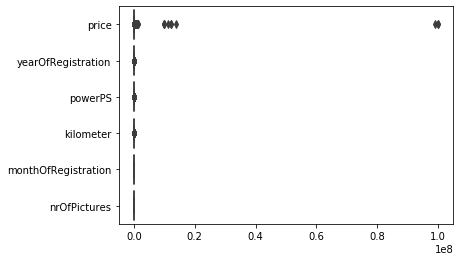

In [8]:
sns.boxplot(data=df[numerical_columns], orient="h")
plt.show()

Масштабирование будем выполнять с помощью нормализации.
График после масштабирования:

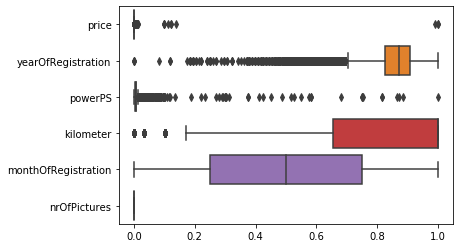

In [9]:
scal = preprocessing.MinMaxScaler()
df[numerical_columns] = scal.fit_transform(df[numerical_columns])
sns.boxplot(data=df[numerical_columns], orient="h")
plt.show()

### 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

Категориальные бинарные признаки заменим на 0 и 1. К небинарным признакам применим dummy-кодирование.

In [10]:
categorical_columns = [i for i in df.columns if df[i].dtype.name == 'object']
print("Categorical: " + str(categorical_columns))


Categorical: ['seller', 'offerType', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


In [11]:
nonbinary = [column for column in categorical_columns if len(df[column].unique()) > 2]

for column in [column for column in categorical_columns if len(df[column].unique()) == 2]:
    for i, unic_item in enumerate(df[column].unique()):
        df[column] = df[column].replace(to_replace=[unic_item], value=[i])

df_nonbinary = pd.get_dummies(df[nonbinary])
df.drop(nonbinary, axis=1, inplace=True)
df = pd.concat([df_nonbinary, df] , axis=1)
df

,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,...,offerType,price,abtest,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,nrOfPictures
3,0,0,0,0,1,0,0,0,0,1,...,0,0.000015,0,0.842593,0,0.00375,1.000000,0.500000,0,0.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0.000036,0,0.907407,0,0.00345,0.586207,0.583333,0,0.0
5,0,0,0,0,0,0,1,0,0,1,...,0,0.000007,0,0.787037,0,0.00510,1.000000,0.833333,1,0.0
6,0,0,1,0,0,0,0,0,0,1,...,0,0.000022,0,0.870370,0,0.00545,1.000000,0.666667,0,0.0
7,0,0,0,0,0,0,1,0,0,1,...,0,0.000000,0,0.648148,0,0.00250,0.241379,0.583333,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371520,0,0,0,0,0,0,1,0,0,1,...,0,0.000032,1,0.870370,0,0.01125,1.000000,0.416667,1,0.0
371521,0,1,0,0,0,0,0,0,0,1,...,0,0.000012,1,0.833333,0,0.00000,1.000000,0.250000,0,0.0
371524,0,0,1,0,0,0,0,0,0,1,...,0,0.000012,0,0.833333,1,0.00505,0.827586,0.250000,0,0.0
371525,0,1,0,0,0,0,0,0,0,0,...,0,0.000092,0,0.796296,0,0.00510,1.000000,0.250000,0,0.0


### 5.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других.

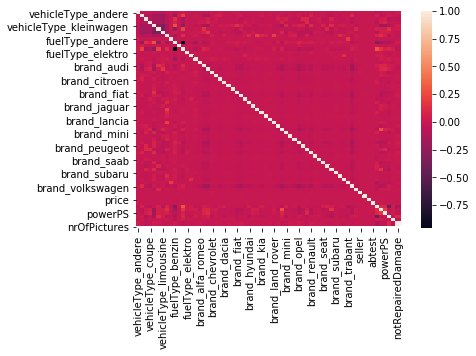

In [12]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

### 6. Заполните пропущенные значения в данных.

In [13]:
df.count()

vehicleType_andere        260952
vehicleType_bus           260952
vehicleType_cabrio        260952
vehicleType_coupe         260952
vehicleType_kleinwagen    260952
                           ...  
powerPS                   260952
kilometer                 260952
monthOfRegistration       260952
notRepairedDamage         260952
nrOfPictures              260952
Length: 65, dtype: int64

Пропущенные значения уже отсутствуют.

### 7.Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.


In [14]:
X, y = df.drop(['price'], axis=1), df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

1) Линейная регрессия без использования регуляризаторов

In [15]:
reg = LinearRegression()
reg.fit(X_train,y_train)
pred_reg = reg.predict(X_test)
print(pred_reg[:15] - y_test[:15])

P, p_value_P = pearsonr(pred_reg, y_test)
print("Pearson corr.: ", P)
print("p_value:", p_value_P)
S, p_value_S = spearmanr(pred_reg, y_test)
print("Spearmen corr.: ", S)
print("p_value:", p_value_S)

173420   -0.000008
182741   -0.000100
271616   -0.000042
218173    0.000011
361460   -0.000031
45771    -0.000034
297004    0.000044
58119    -0.000008
304305    0.000055
183986   -0.000010
274833    0.000051
346765   -0.000058
237316   -0.000016
107975   -0.000007
241922   -0.000035
Name: price, dtype: float64
Pearson corr.:  0.014858559305186146
p_value: 3.217016445740254e-05
Spearmen corr.:  0.6748706244111886
p_value: 0.0


2) Линейная регрессия, LASSO регуляризатор

In [16]:
lasso = Lasso()
params = {'alpha': np.arange(0, 0.1, 0.01)}
lasso_grid = GridSearchCV(lasso, params)
lasso_grid.fit(X_train, y_train)
best_alpha = lasso_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

lasso = Lasso(best_alpha)
lasso.fit(X_train,y_train)
pred_las = lasso.predict(X_test)
print(pred_las[:15] - y_test[:15])

P, p_value_P = pearsonr(pred_las, y_test)
print("Pearson corr.: ", P)
print("p_value:", p_value_P)
S, p_value_S = spearmanr(pred_las, y_test)
print("Spearmen corr.: ", S)
print("p_value:", p_value_S)



best alpha: 0.0
173420   -0.000008
182741   -0.000100
271616   -0.000042
218173    0.000011
361460   -0.000031
45771    -0.000034
297004    0.000044
58119    -0.000008
304305    0.000054
183986   -0.000010
274833    0.000051
346765   -0.000058
237316   -0.000016
107975   -0.000007
241922   -0.000035
Name: price, dtype: float64
Pearson corr.:  0.014858681019399035
p_value: 3.216536989950002e-05
Spearmen corr.:  0.6746674485837861
p_value: 0.0
